<a href="https://colab.research.google.com/github/srishtivishnoi2102/Deep-Learning-with-Keras/blob/master/catsVSdogsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -c http://files.fast.ai/files/dogscats.zip

--2019-09-07 14:13:23--  http://files.fast.ai/files/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 861515103 (822M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 821.60M  14.4MB/s    in 60s     

2019-09-07 14:14:24 (13.7 MB/s) - ‘dogscats.zip’ saved [861515103/861515103]



In [ ]:
!unzip dogscats.zip

Archive:  dogscats.zip
   creating: dogscats/
   creating: dogscats/test1/
  inflating: dogscats/test1/9292.jpg  
  inflating: dogscats/test1/12026.jpg  
  inflating: dogscats/test1/9688.jpg  
  inflating: dogscats/test1/4392.jpg  
  inflating: dogscats/test1/779.jpg  
  inflating: dogscats/test1/2768.jpg  
  inflating: dogscats/test1/2399.jpg  
  inflating: dogscats/test1/12225.jpg  
  inflating: dogscats/test1/10947.jpg  
  inflating: dogscats/test1/1780.jpg  
  inflating: dogscats/test1/11631.jpg  
  inflating: dogscats/test1/8478.jpg  
  inflating: dogscats/test1/7940.jpg  
  inflating: dogscats/test1/5102.jpg  
  inflating: dogscats/test1/1704.jpg  
  inflating: dogscats/test1/5967.jpg  
  inflating: dogscats/test1/1261.jpg  
  inflating: dogscats/test1/11882.jpg  
  inflating: dogscats/test1/3237.jpg  
  inflating: dogscats/test1/10222.jpg  
  inflating: dogscats/test1/10854.jpg  
  inflating: dogscats/test1/6810.jpg  
  inflating: dogscats/test1/8615.jpg  
  inflating: dogscats/

# Applying Convolution Filters

In [ ]:
#!/bin/python
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
im = Image.open("dogscats/train/dogs/dog.1.jpg")

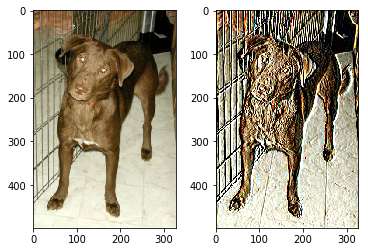

In [ ]:
kernelValues = [-2,1,2,
                -10,0,10,
                -2,1,2] #filter
kernel = ImageFilter.Kernel((3,3), kernelValues)
im2 = im.filter(kernel)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im)
ax2.imshow(im2)

# Part 1

## Steps to build CNN

1.   Convolution
2.   Max Pooling
1.   Flatten
2.   Fully Connected Layer


In [ ]:
# importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

Using TensorFlow backend.


In [ ]:
# initialising the CNN
classifier=Sequential()


# adding first convolution2D layer
nb_feature_map=32
nb_rows_feature_map=3
nb_cols_feature_map=3
image_shape=(128,128,3)
classifier.add(Convolution2D( nb_feature_map , nb_rows_feature_map , nb_cols_feature_map,input_shape=image_shape,activation='relu'))

# adding the Pooling layer

poolsize=(2,2)
classifier.add(MaxPooling2D(pool_size=poolsize))


# adding second convolution2D layer
classifier.add(Convolution2D( nb_feature_map//2 , nb_rows_feature_map , nb_cols_feature_map, activation='relu'))

# adding the Pooling layer
classifier.add(MaxPooling2D(pool_size=poolsize))


# Flatteing the pooled feature maps

classifier.add(Flatten())


# create the classic ANN, 

classifier.add(Dense(output_dim=512, activation='relu'))

classifier.add(Dense(output_dim=64, activation='relu'))

classifier.add(Dense(output_dim=1, activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [ ]:
# Compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Part 2

Fitting the CNN to the images 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_data= train_datagen.flow_from_directory(
        'dogscats/train',
        target_size=(128, 128),
        batch_size=230,
        class_mode='binary')

testing_valid_data = test_datagen.flow_from_directory(
        'dogscats/valid',
        target_size=(128, 128),
        class_mode='binary')


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# Fitting the Data

classifier.fit_generator(
        training_data,
        epochs=50,
        shuffle=True,
        validation_data=testing_valid_data
        )

Epoch 1/50
100/100 [==============================] - 117s 1s/step - loss: 0.5556 - acc: 0.7161 - val_loss: 0.5339 - val_acc: 0.7375
Epoch 2/50
100/100 [==============================] - 113s 1s/step - loss: 0.5263 - acc: 0.7365 - val_loss: 0.5056 - val_acc: 0.7505
Epoch 3/50
100/100 [==============================] - 113s 1s/step - loss: 0.4849 - acc: 0.7664 - val_loss: 0.4718 - val_acc: 0.7795
Epoch 4/50
100/100 [==============================] - 113s 1s/step - loss: 0.4807 - acc: 0.7670 - val_loss: 0.4556 - val_acc: 0.7835
Epoch 5/50
100/100 [==============================] - 113s 1s/step - loss: 0.4466 - acc: 0.7924 - val_loss: 0.4923 - val_acc: 0.7700
Epoch 6/50
100/100 [==============================] - 113s 1s/step - loss: 0.4238 - acc: 0.8049 - val_loss: 0.4149 - val_acc: 0.8115
Epoch 7/50
100/100 [==============================] - 113s 1s/step - loss: 0.4144 - acc: 0.8075 - val_loss: 0.4143 - val_acc: 0.8125
Epoch 8/50
100/100 [==============================] - 112s 1s/step - 

In [ ]:
classifier.evaluate(testing_valid_data)

20/20 [==============================] - 4s 219ms/step


[0.8934079974889755, 0.824000009894371]

In [ ]:
classifier.predict_generator(testing_valid_data)

array([[1.0456651e-02],
       [1.6271591e-02],
       [9.9999881e-01],
       ...,
       [4.1633844e-05],
       [1.8312892e-01],
       [9.9627537e-01]], dtype=float32)